In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess

In [94]:
# Run the data generation script
subprocess.run(["pip", "install", "-r", "requirements.txt"])
subprocess.run(["g++", "-o", "fourier", "fourier.cpp", "-lm"])
subprocess.run(["./fourier"])

CompletedProcess(args=['./fourier'], returncode=0)

In [95]:
csv_file = []
for file in os.listdir():
    if file.endswith(".csv"):
        csv_file.append(file)
        print(file)


trajectory_position.csv
PID1.csv
inverted_trajectory_component.csv
alternative_kalman2.csv
luenberger2.csv
alternative_kalman1.csv
inverted_trajectory_position.csv
kalman2.csv
extended_kalman1.csv
trajectory_component.csv
kalman1.csv
PID2.csv
luenberger1.csv
extended_kalman2.csv
LQR1.csv
LQR2.csv


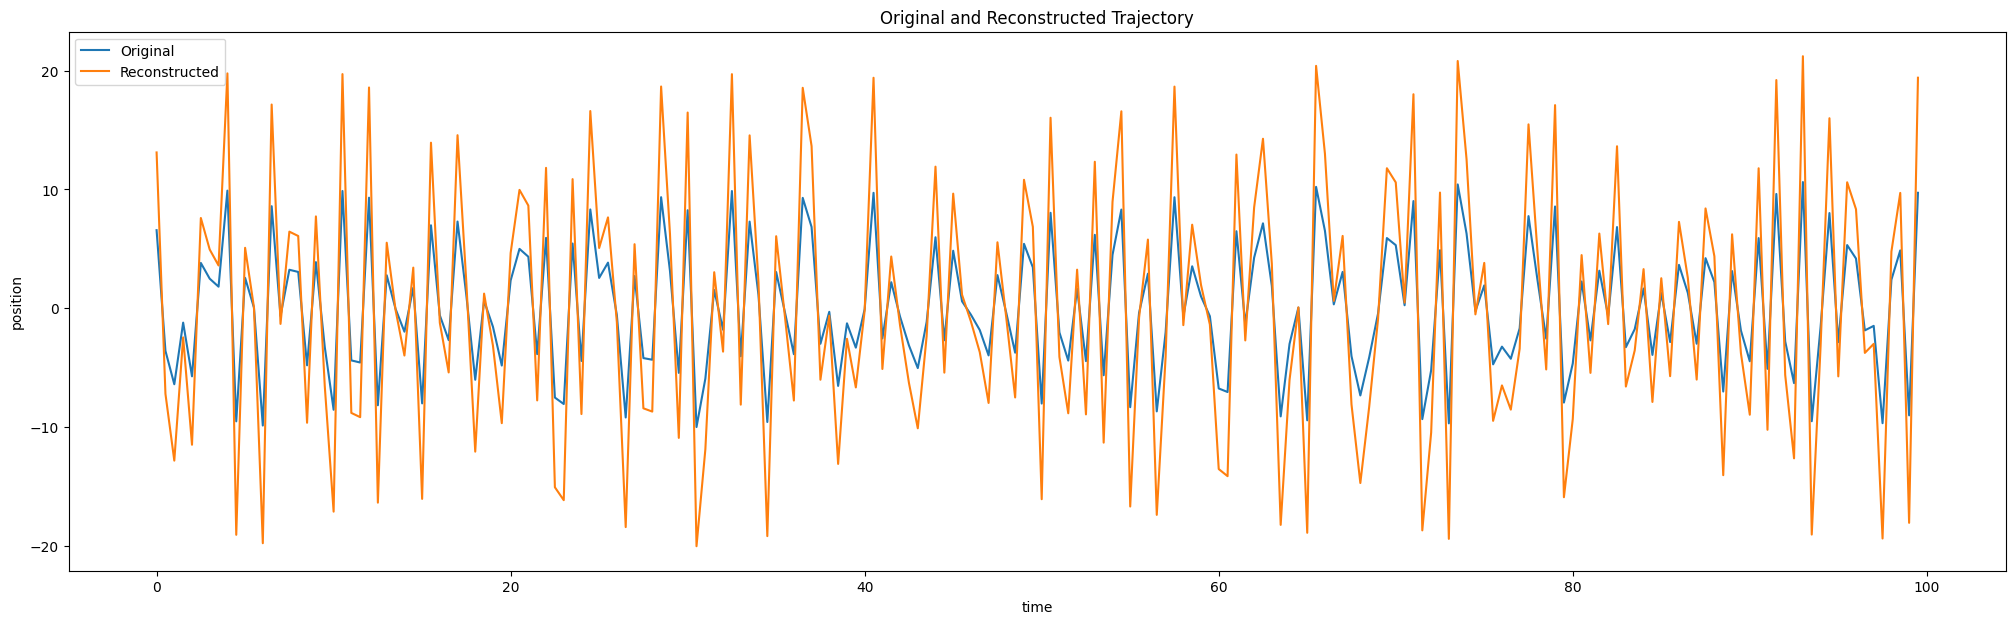

In [96]:
trajectory = pd.read_csv("trajectory_position.csv")
inverted_trajectory = pd.read_csv("inverted_trajectory_position.csv")

# plot in a figure size x=25, y=7
fig = plt.figure(figsize=(25, 7))
plt.plot(trajectory["time"], trajectory["position"])
plt.plot(inverted_trajectory["time"], inverted_trajectory["position"])
plt.xlabel("time")
plt.ylabel("position")
plt.title("Original and Reconstructed Trajectory")
plt.legend(["Original", "Reconstructed"])
plt.show()

In [97]:
# Combine trajectory and inverted trajectory dataframes with unique headers
trajectory_component = pd.read_csv("trajectory_component.csv")
inverted_trajectory_component = pd.read_csv("inverted_trajectory_component.csv")

# convert to table
trajectory_component = trajectory_component.pivot_table(index="n", values=["angular_velocity", "amplitude", "phase"])
inverted_trajectory_component = inverted_trajectory_component.pivot_table(index="n", values=["angular_velocity", "amplitude", "phase"])

trajectory_component

amplitude  angular_velocity     phase
n                                       
0   1.766080           4.79468  0.438077
1   2.100630           8.68547  3.886050
2   2.909630           3.72854  5.982410
3   2.397900           7.04647  3.389720
4   2.549950          -1.68590  4.703120
5   3.632620          -1.51465  5.634330
6   1.377560           8.97220  6.693300
7   0.060341           7.02669  8.957820
8   3.366670           7.98622  4.628220
9   3.821870          -4.87199  7.217400

In [98]:
inverted_trajectory_component

amplitude  angular_velocity     phase
n                                       
0   0.075728          0.000000  0.000000
1   0.144884          0.062832  1.593210
2   0.108305          0.125664  1.871580
3   0.212413          0.188496 -0.103509
4   0.126538          0.251327  0.654266
5   0.139431          0.314159  1.702230
6   0.277419          0.376991 -1.617940
7   0.293145          0.439823 -2.687320
8   0.296319          0.502655  2.182970
9   0.312416          0.565487 -2.440150

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' total_output']


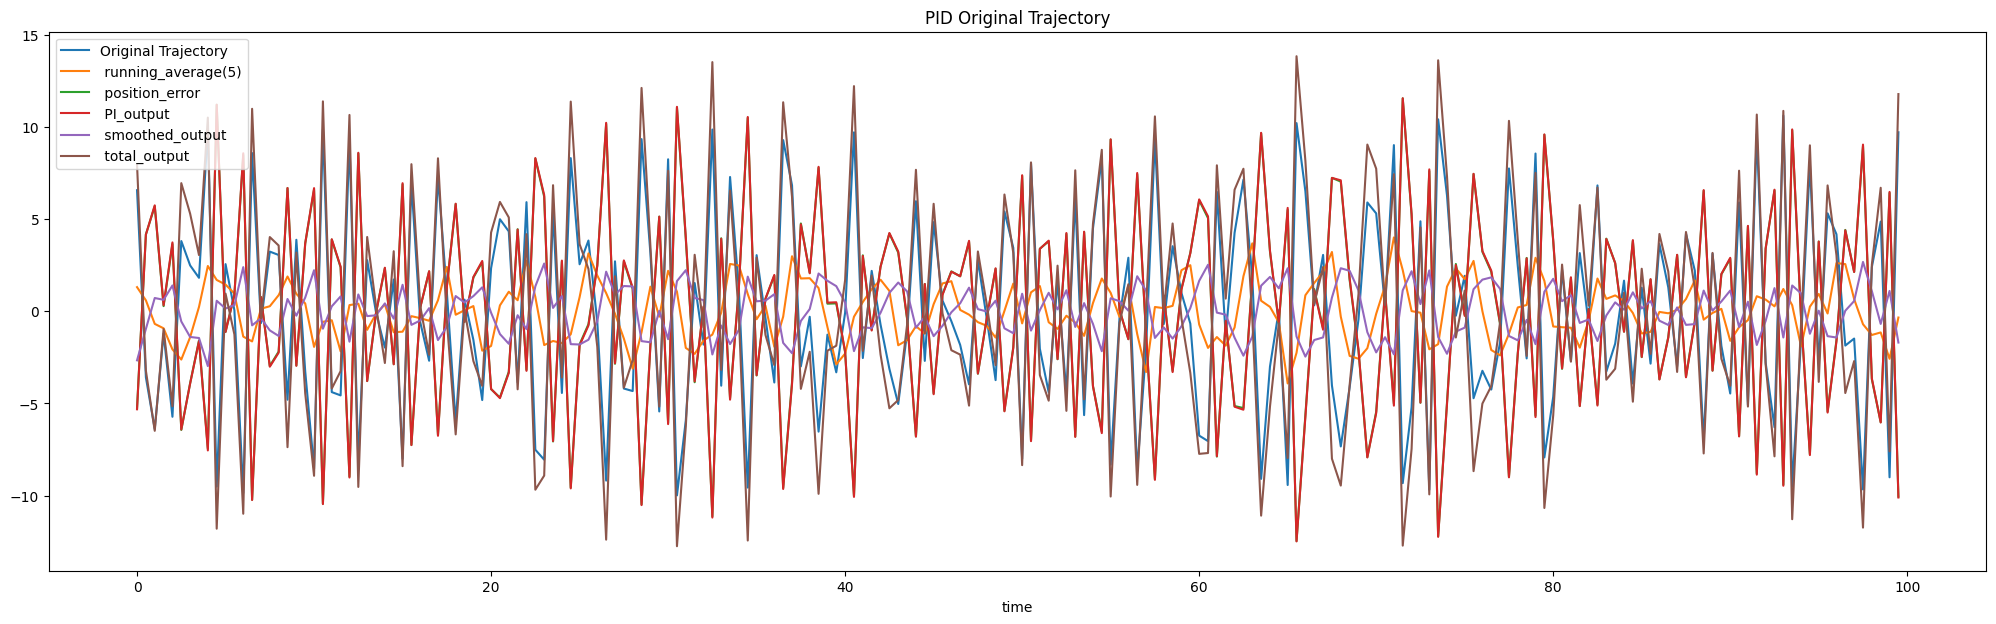

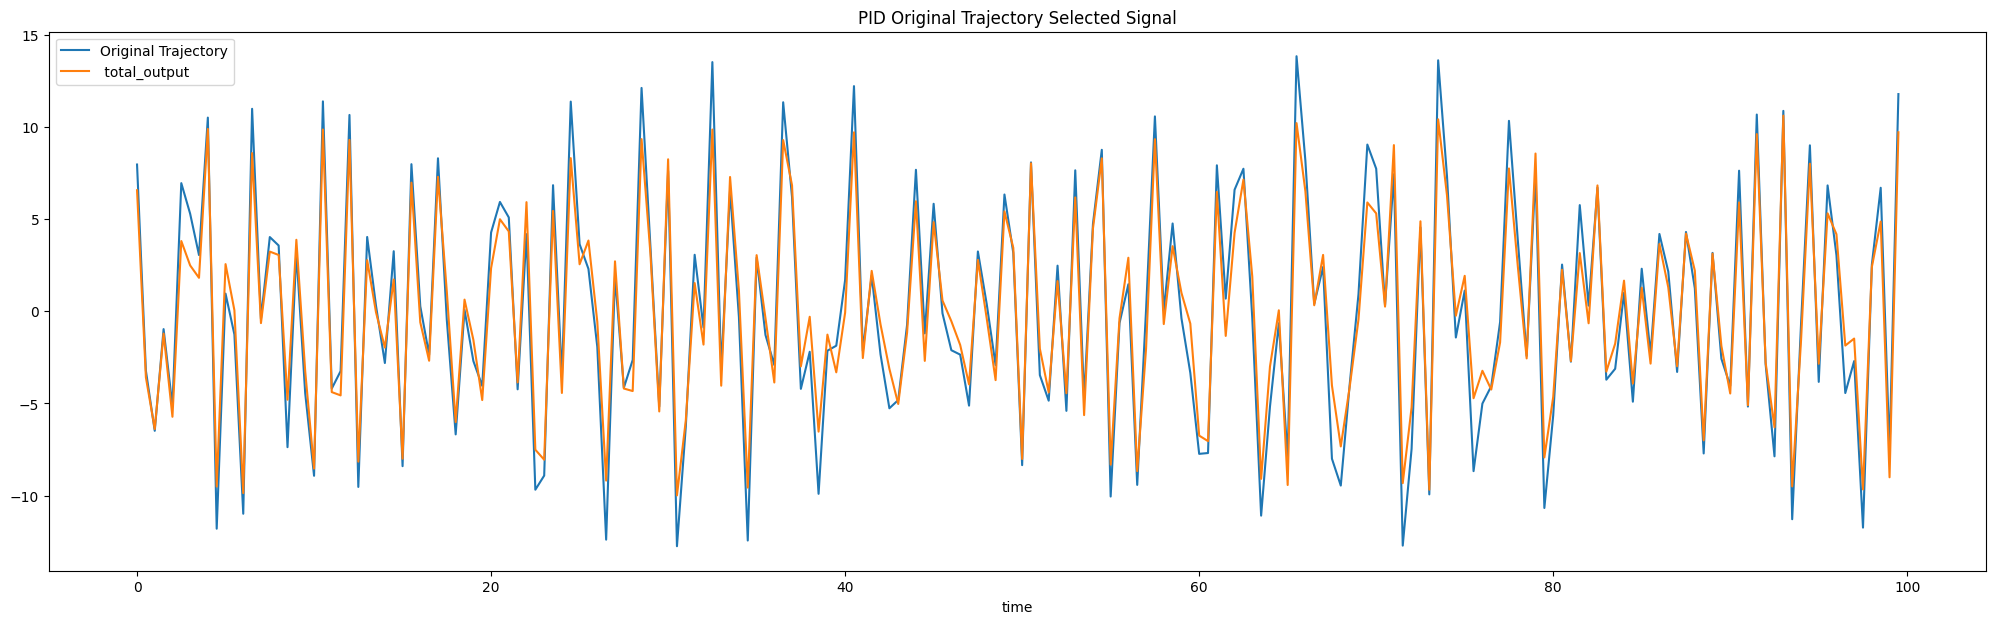

['predicted_position', 'filtered_position', 'position_error', 'kalman_gain_position', 'kalman_gain_velocity']


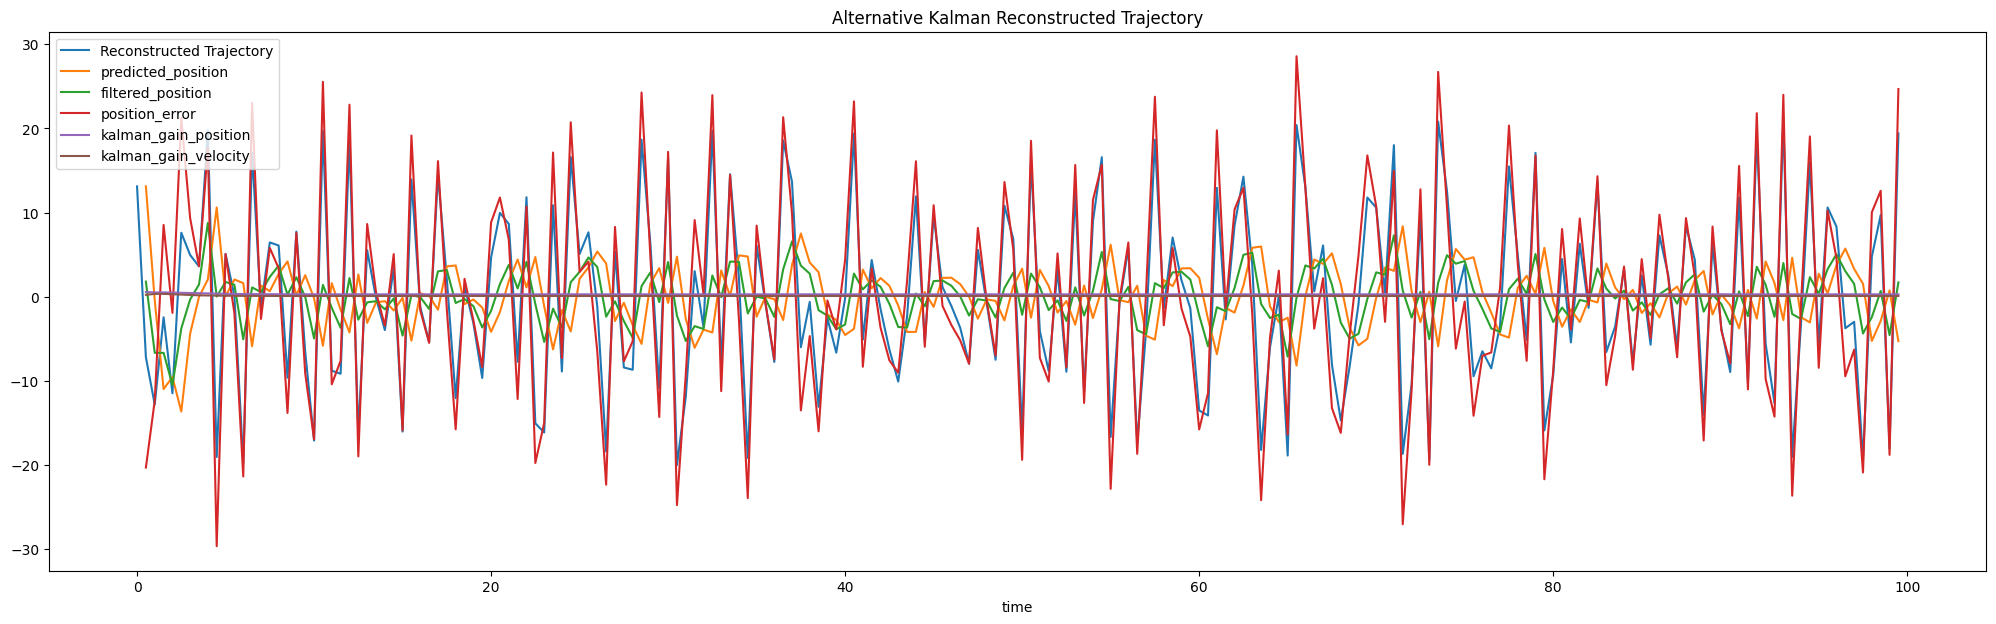

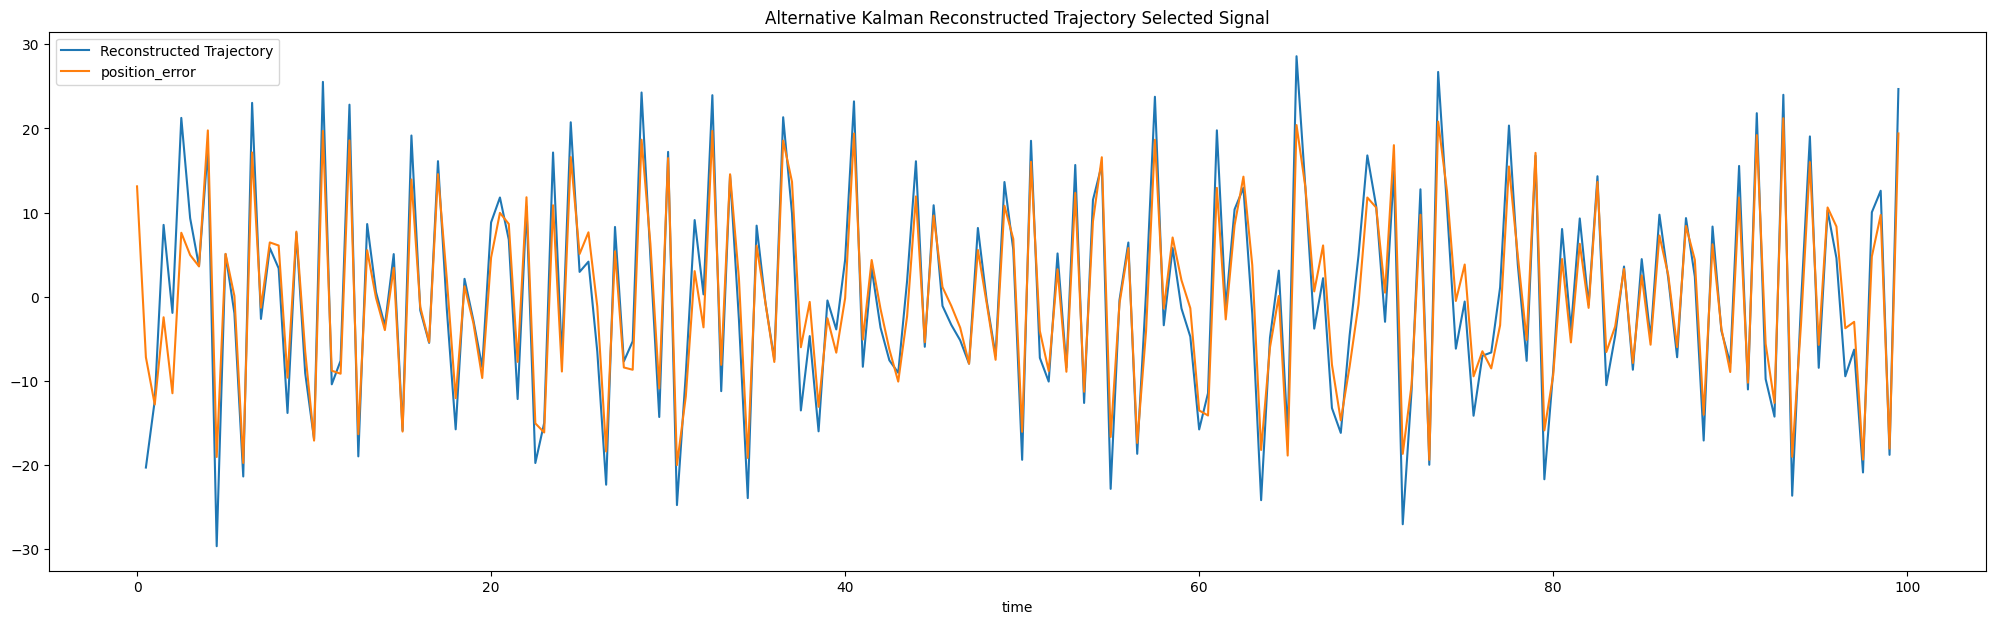

['estimated_position']


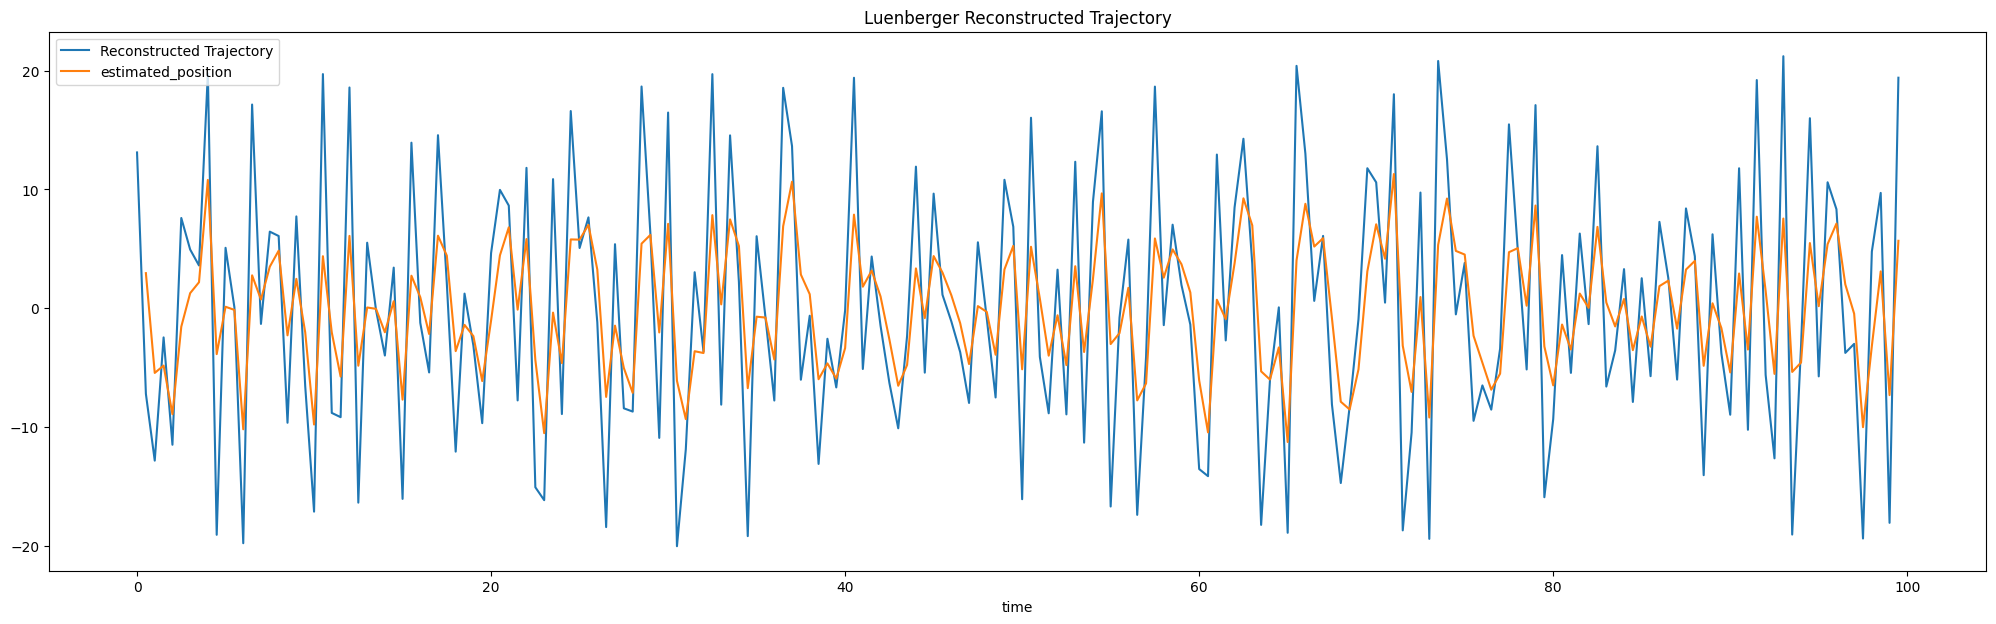

['predicted_position', 'filtered_position', 'position_error', 'kalman_gain_position', 'kalman_gain_velocity']


<Figure size 2500x700 with 0 Axes>

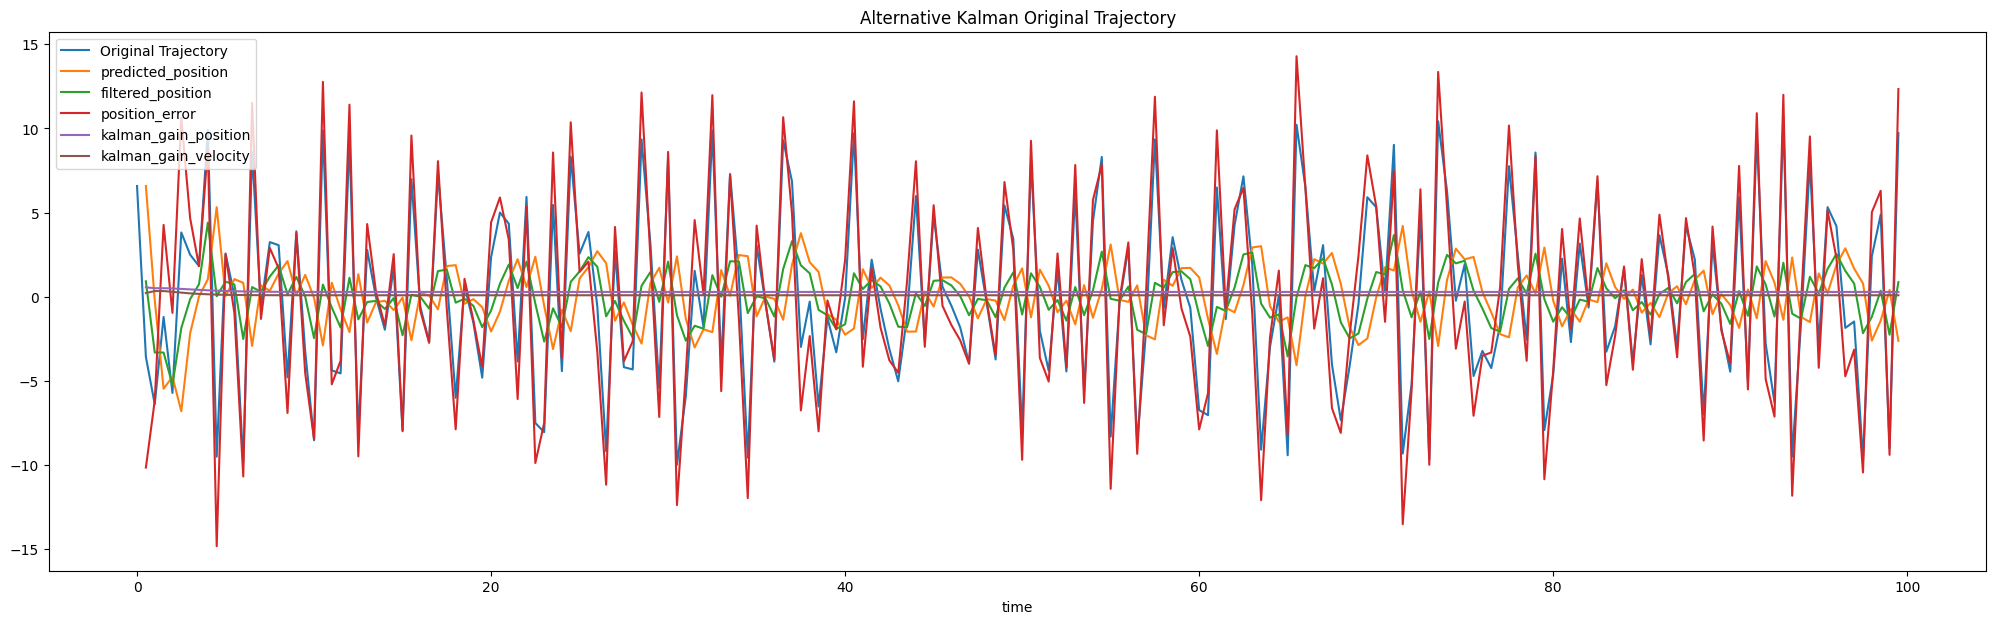

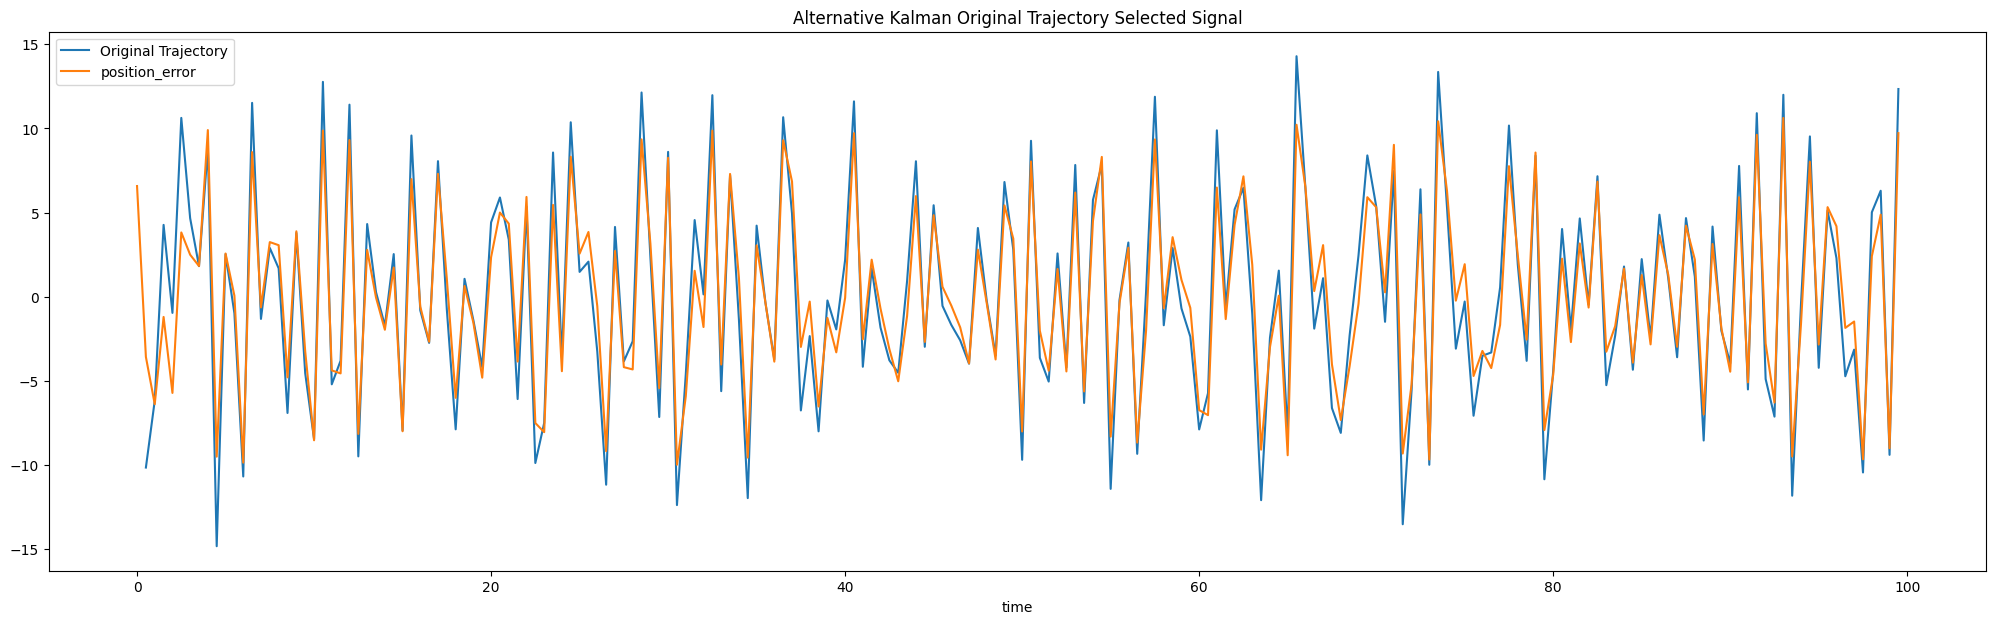

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' PID_out', ' kalman_estimate', ' kalman_gain']


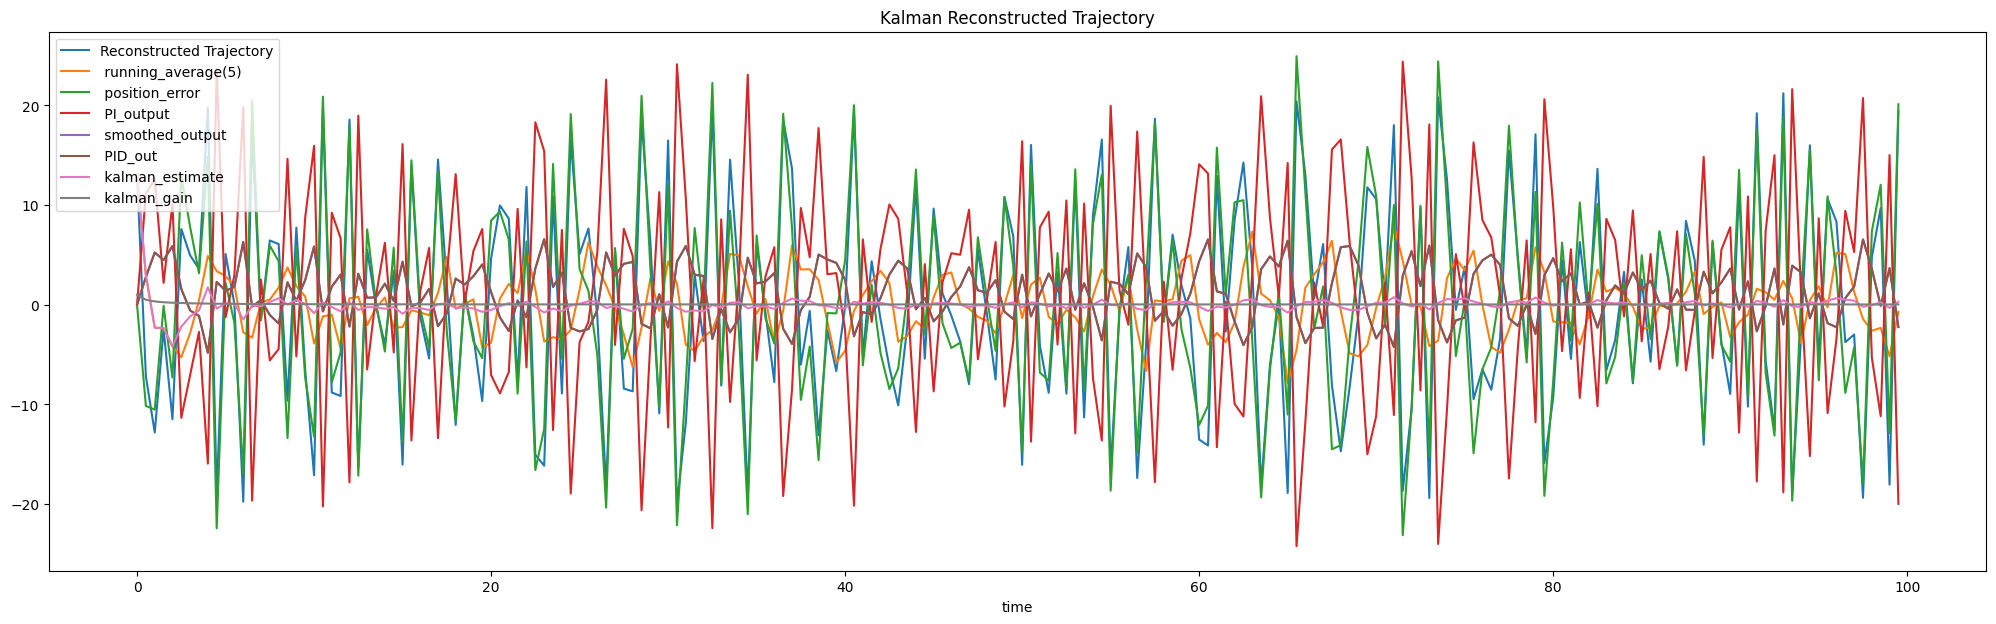

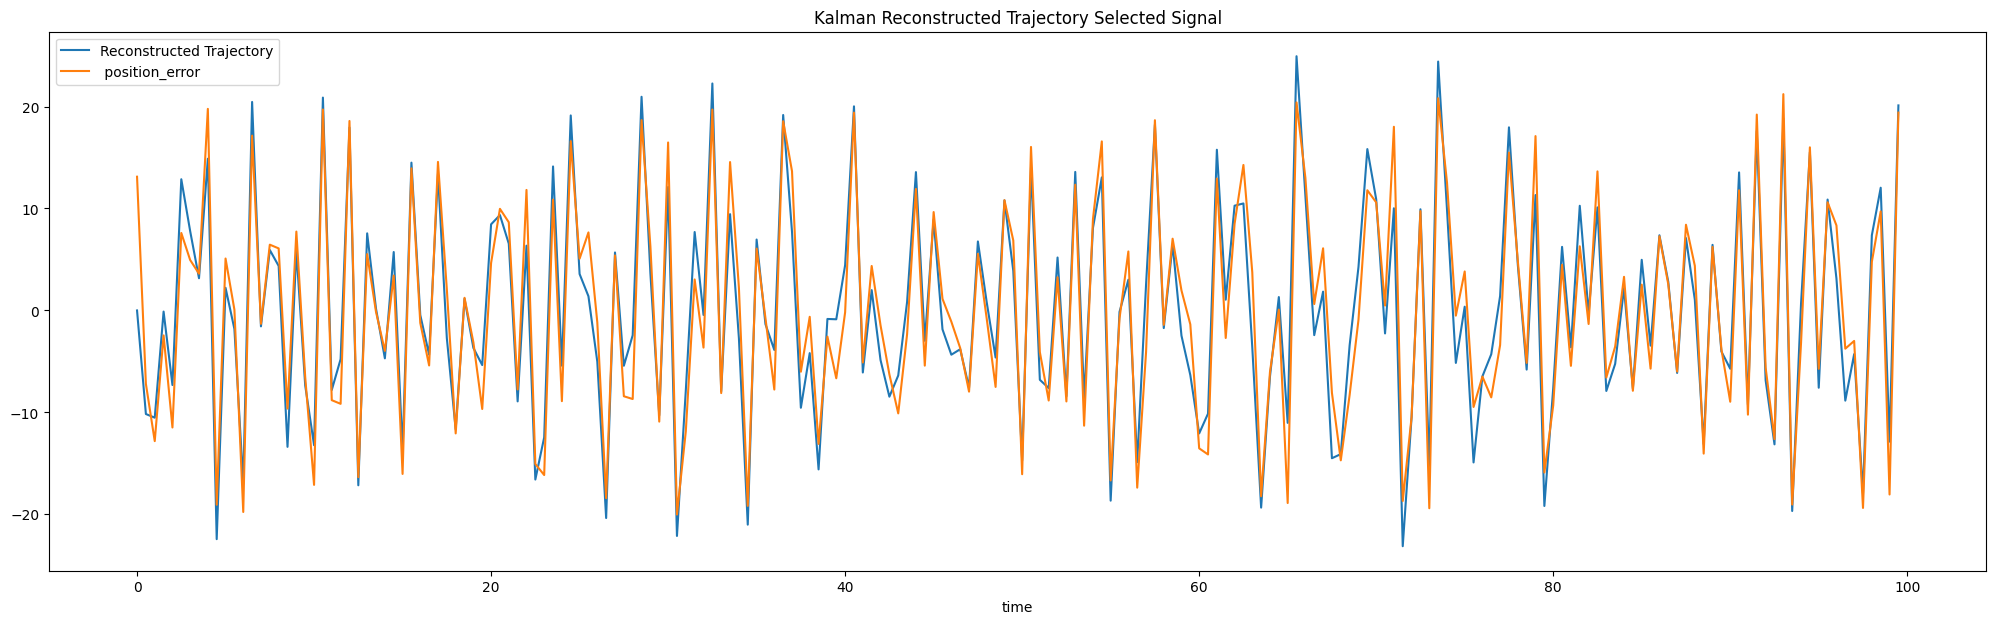

['predicted_position', 'filtered_position', 'position_error']


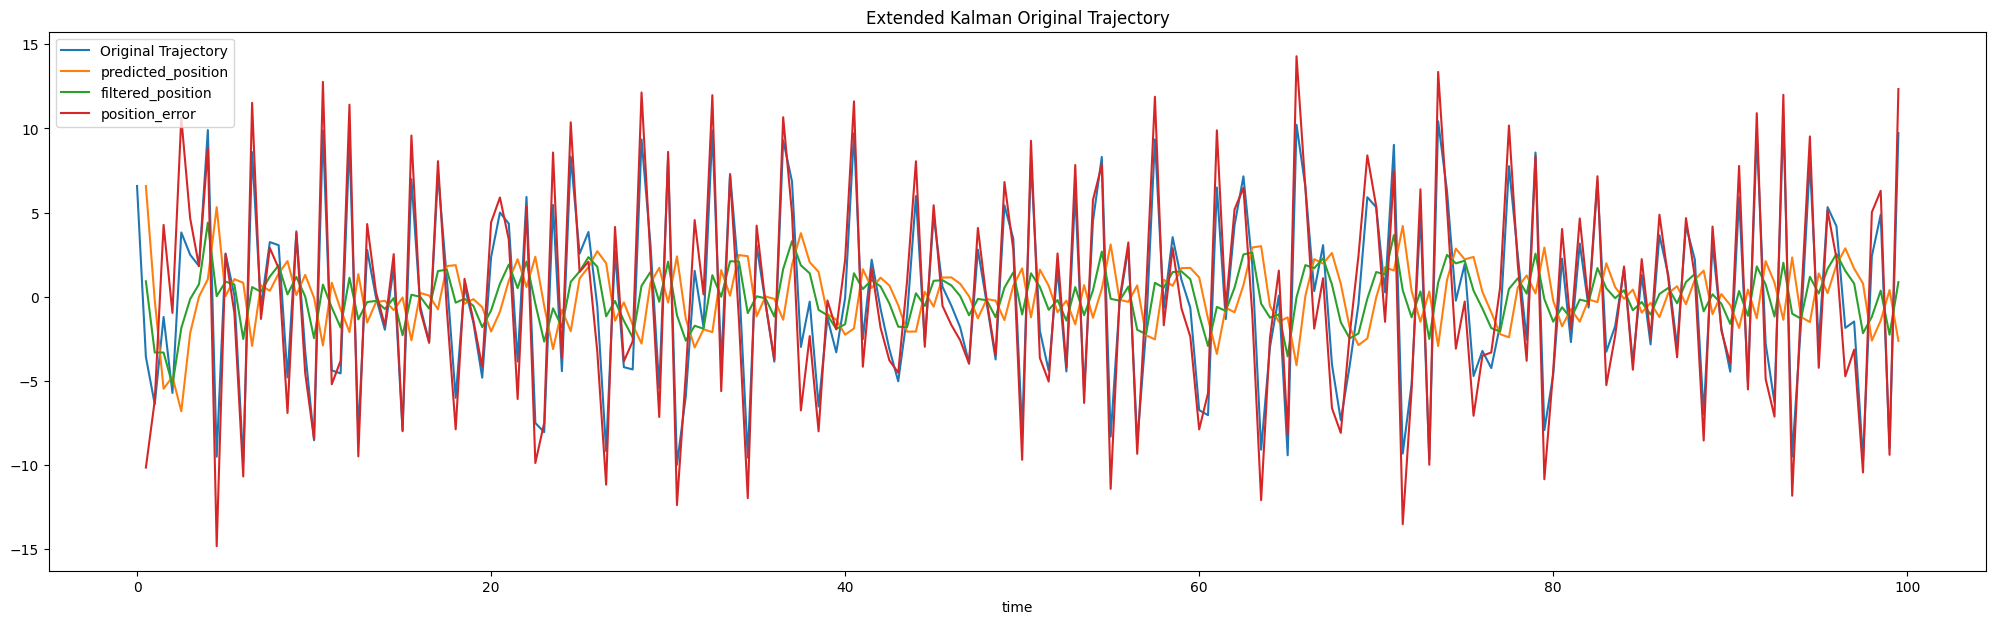

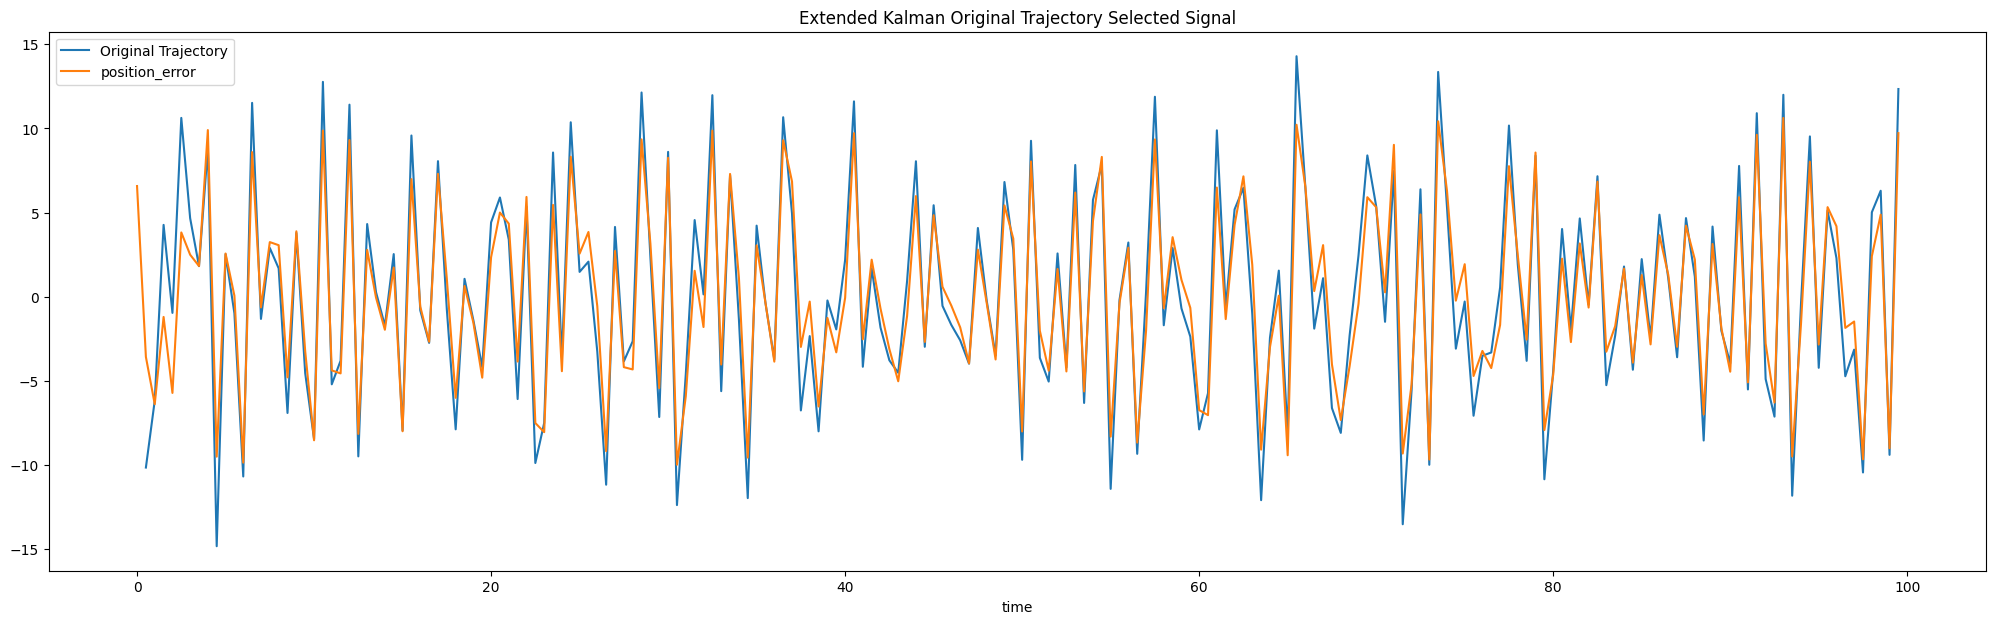

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' PID_out', ' kalman_estimate', ' kalman_gain']


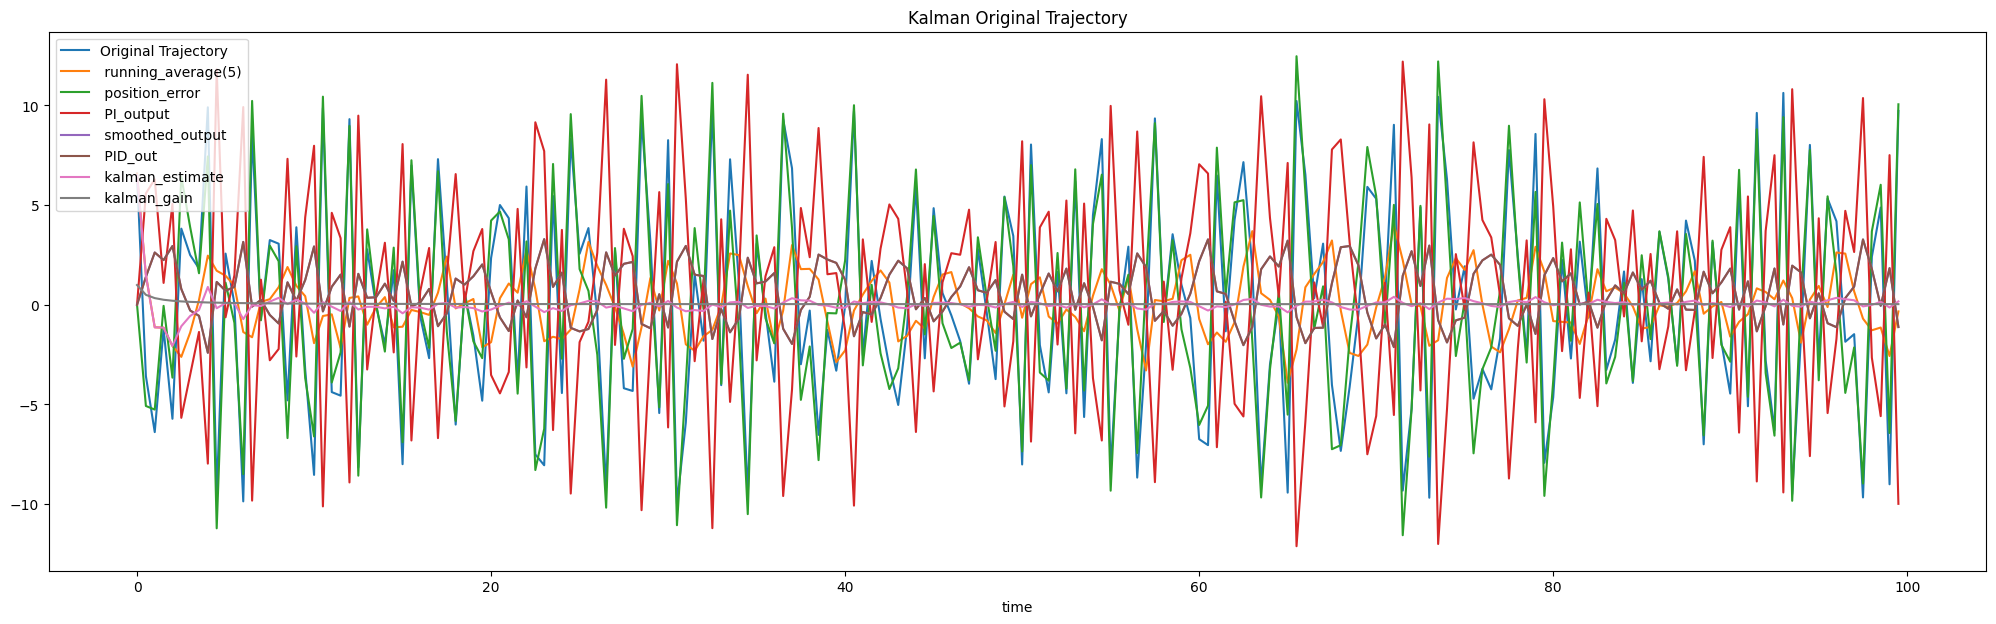

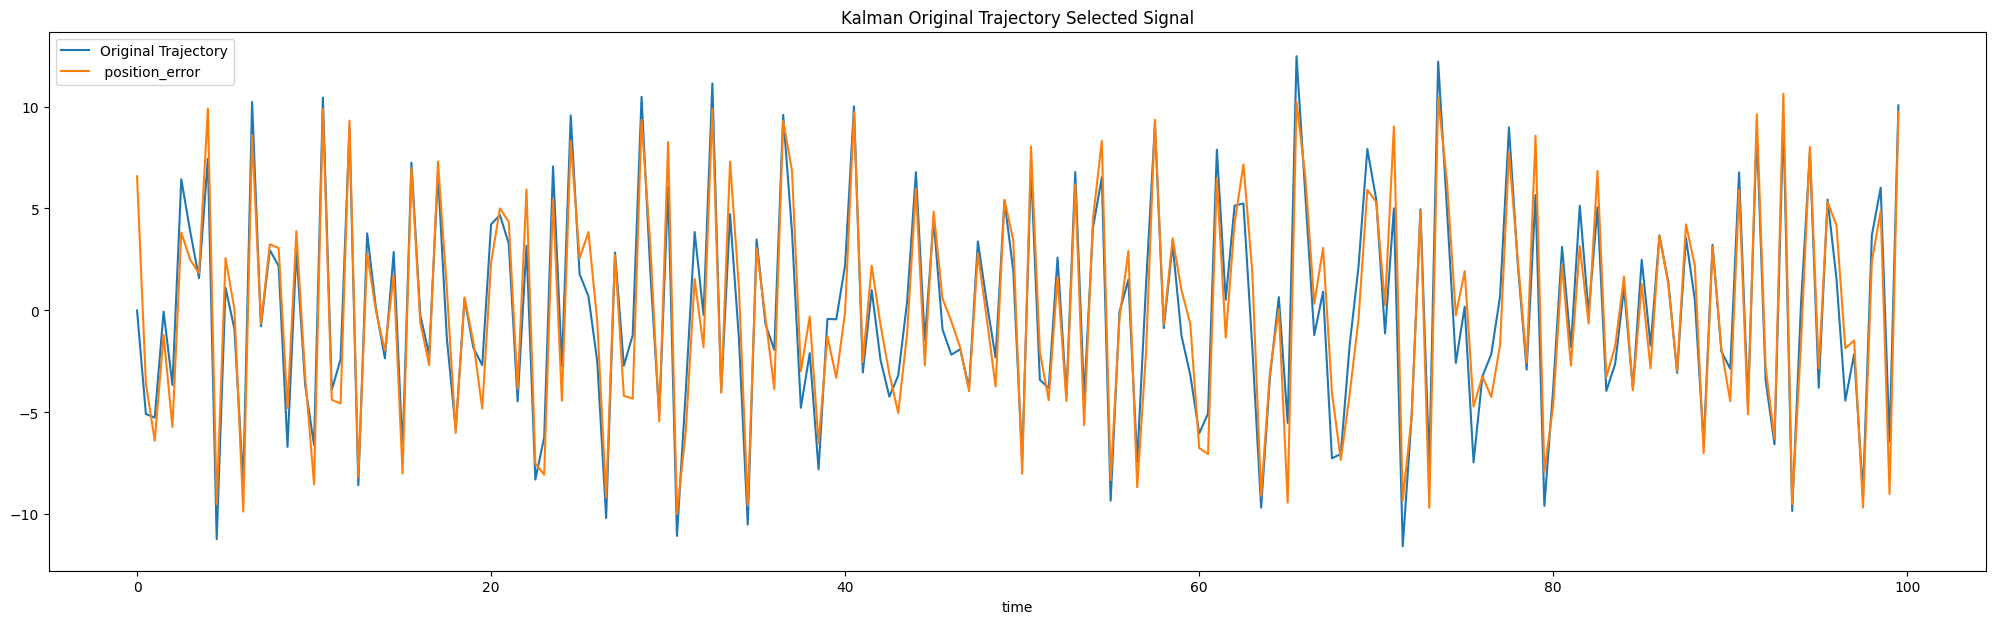

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' total_output']


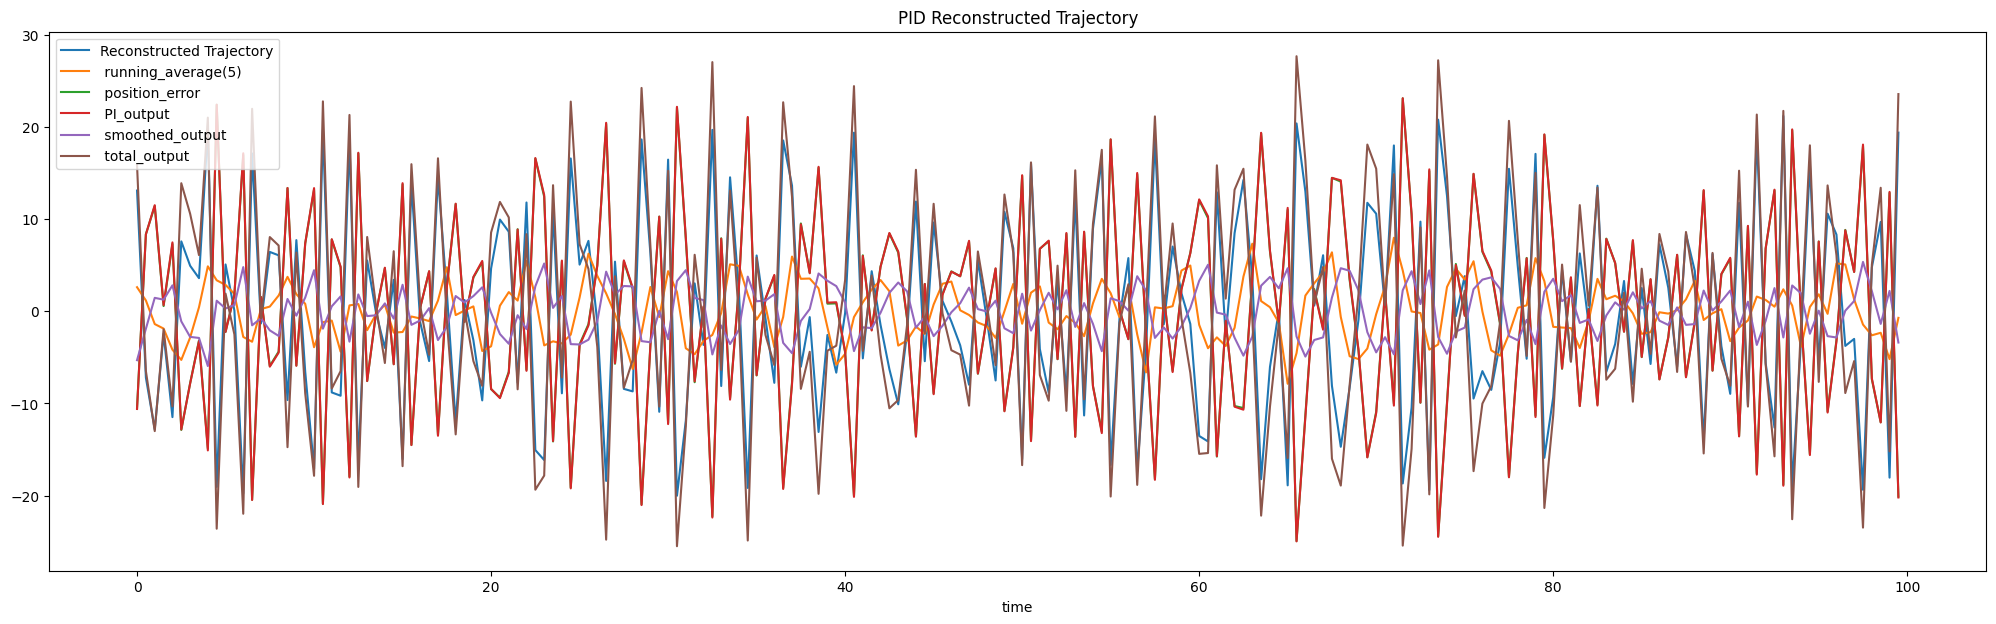

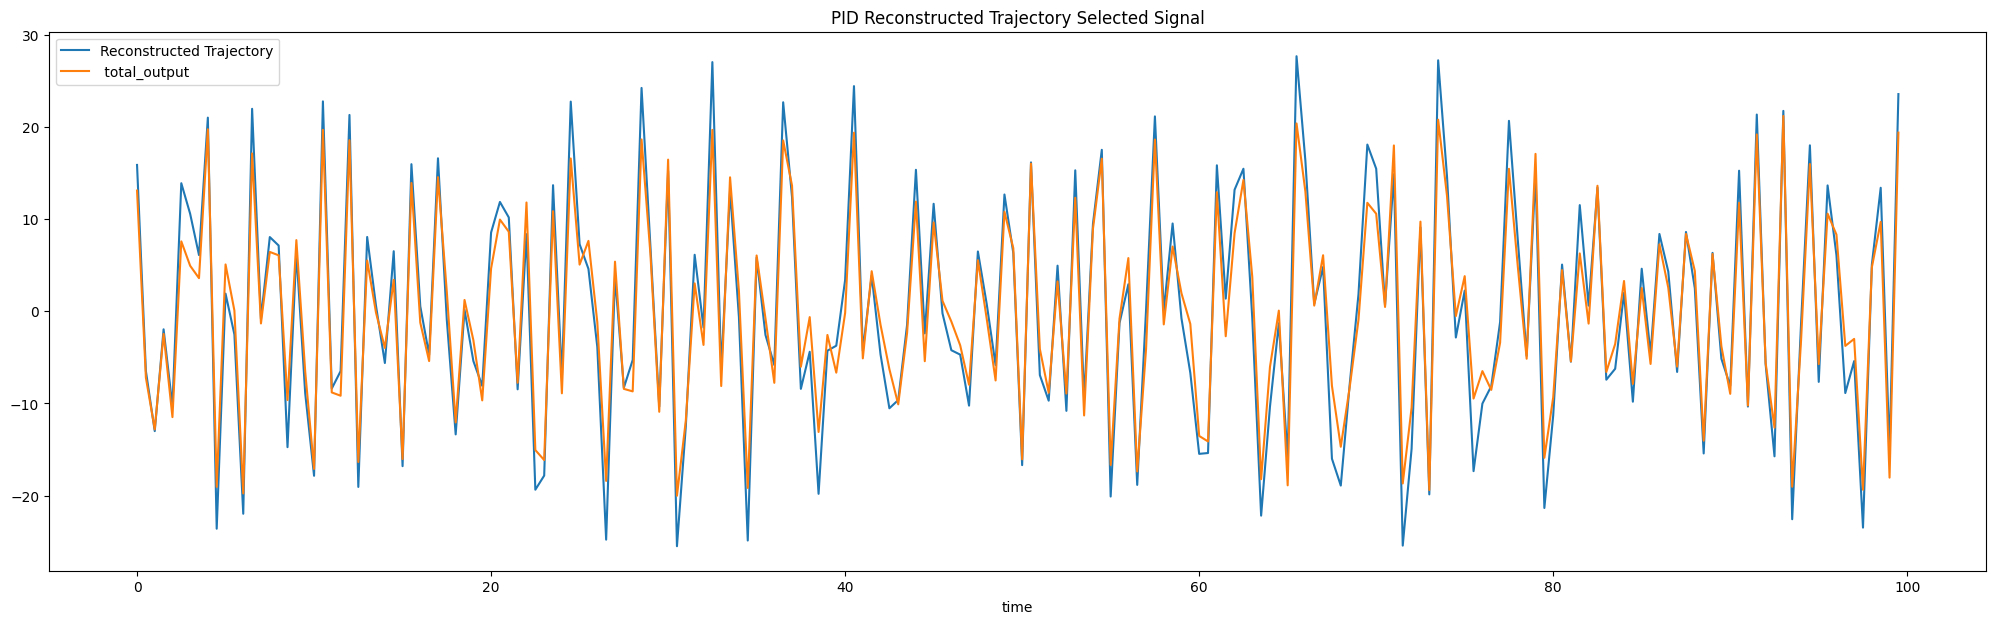

['estimated_position']


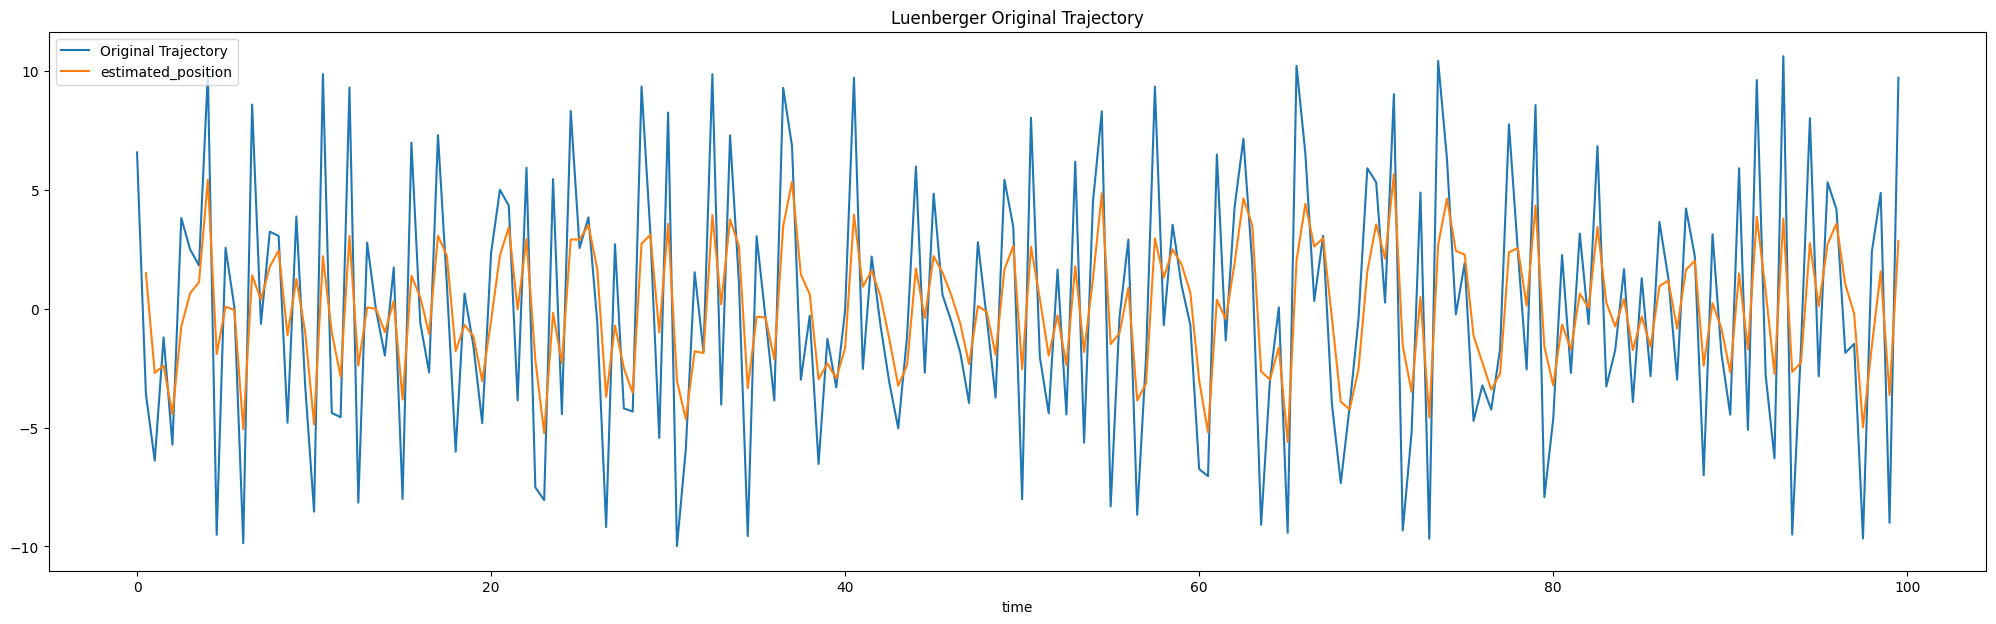

['predicted_position', 'filtered_position', 'position_error']


<Figure size 2500x700 with 0 Axes>

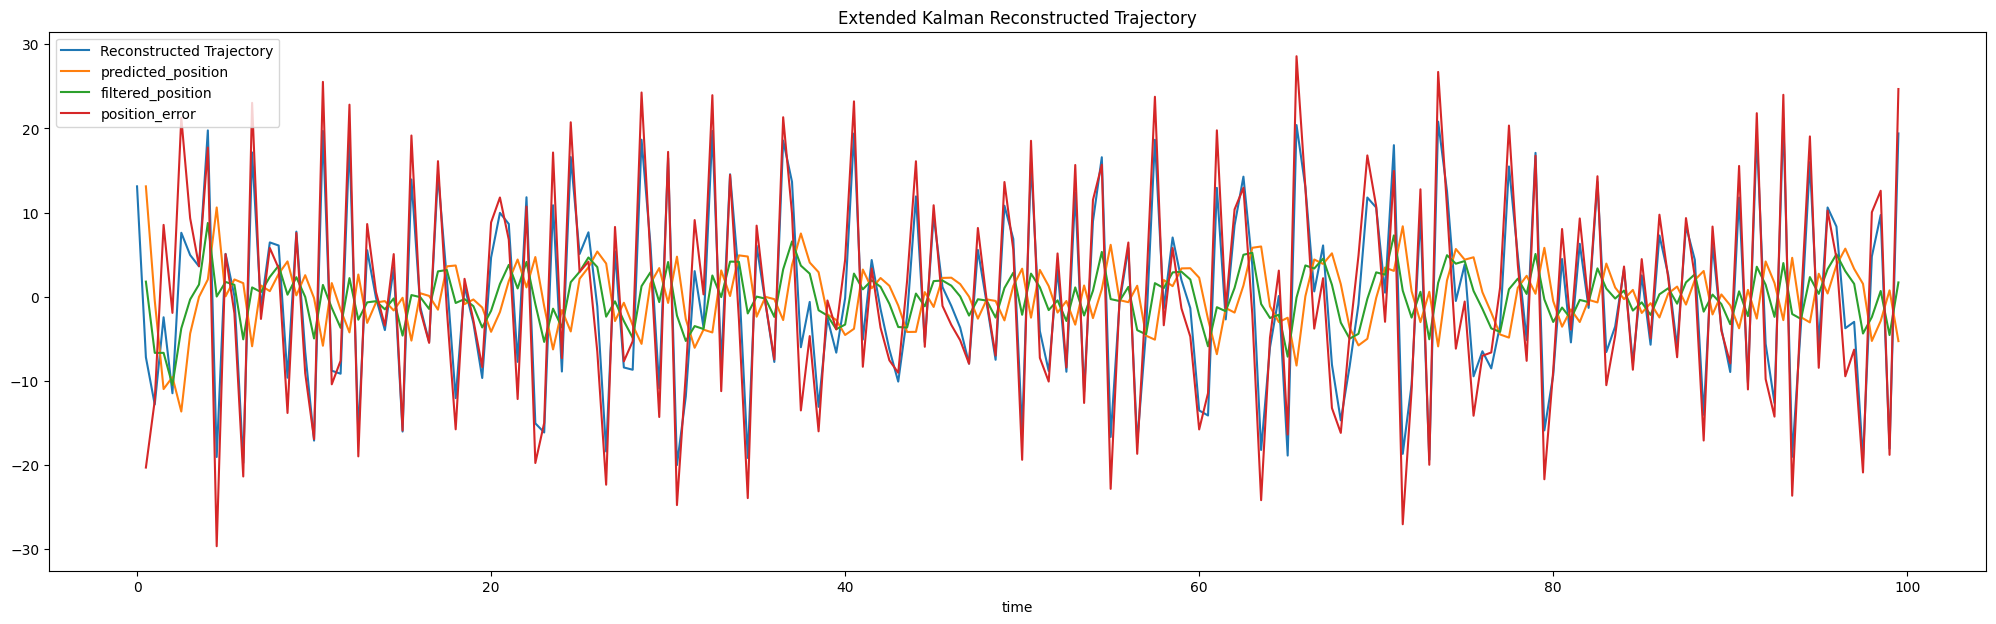

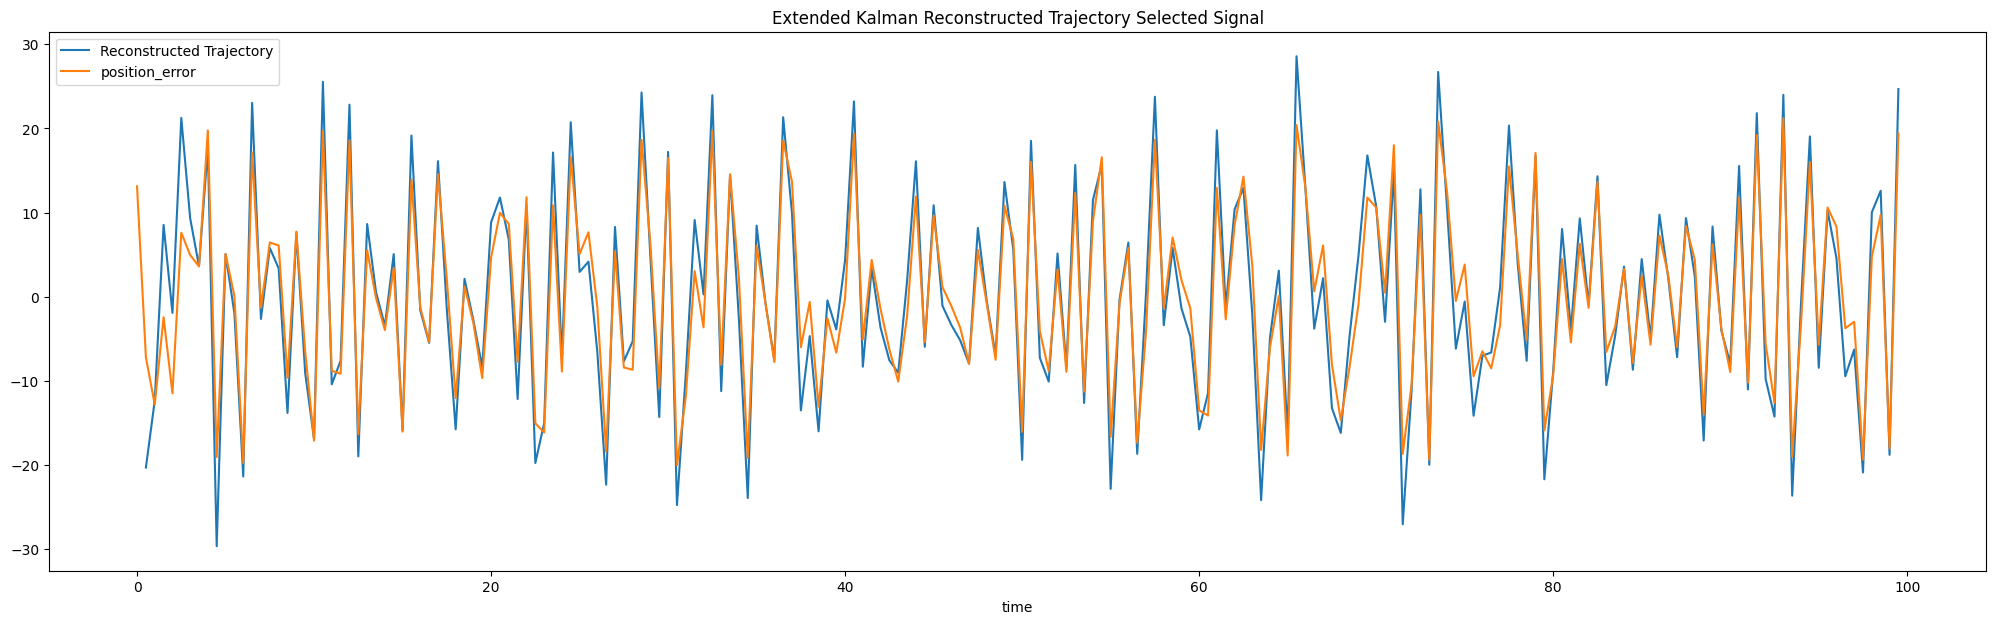

['estimated_position']


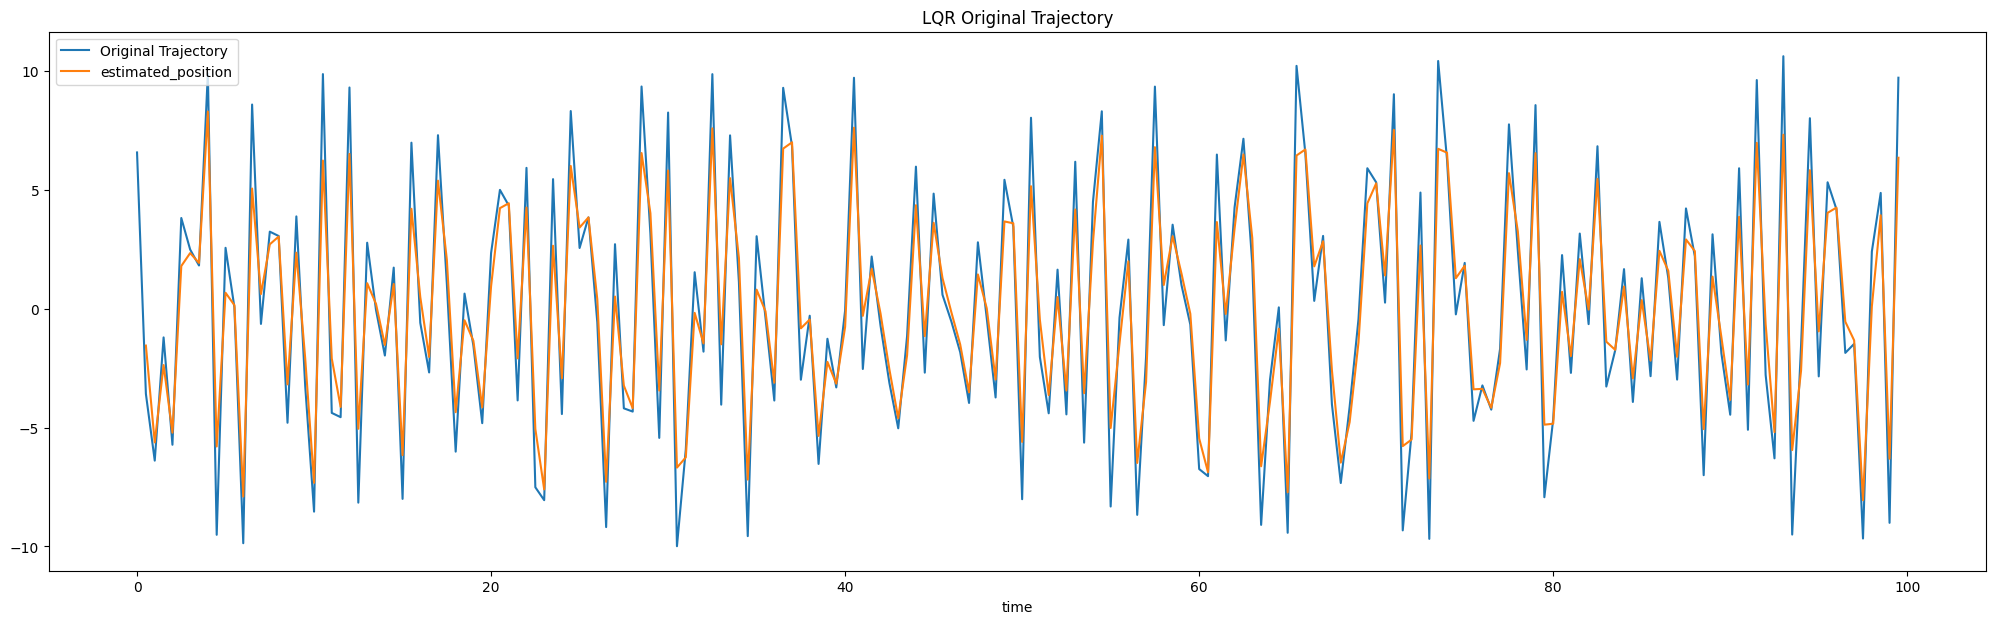

['estimated_position']


<Figure size 2500x700 with 0 Axes>

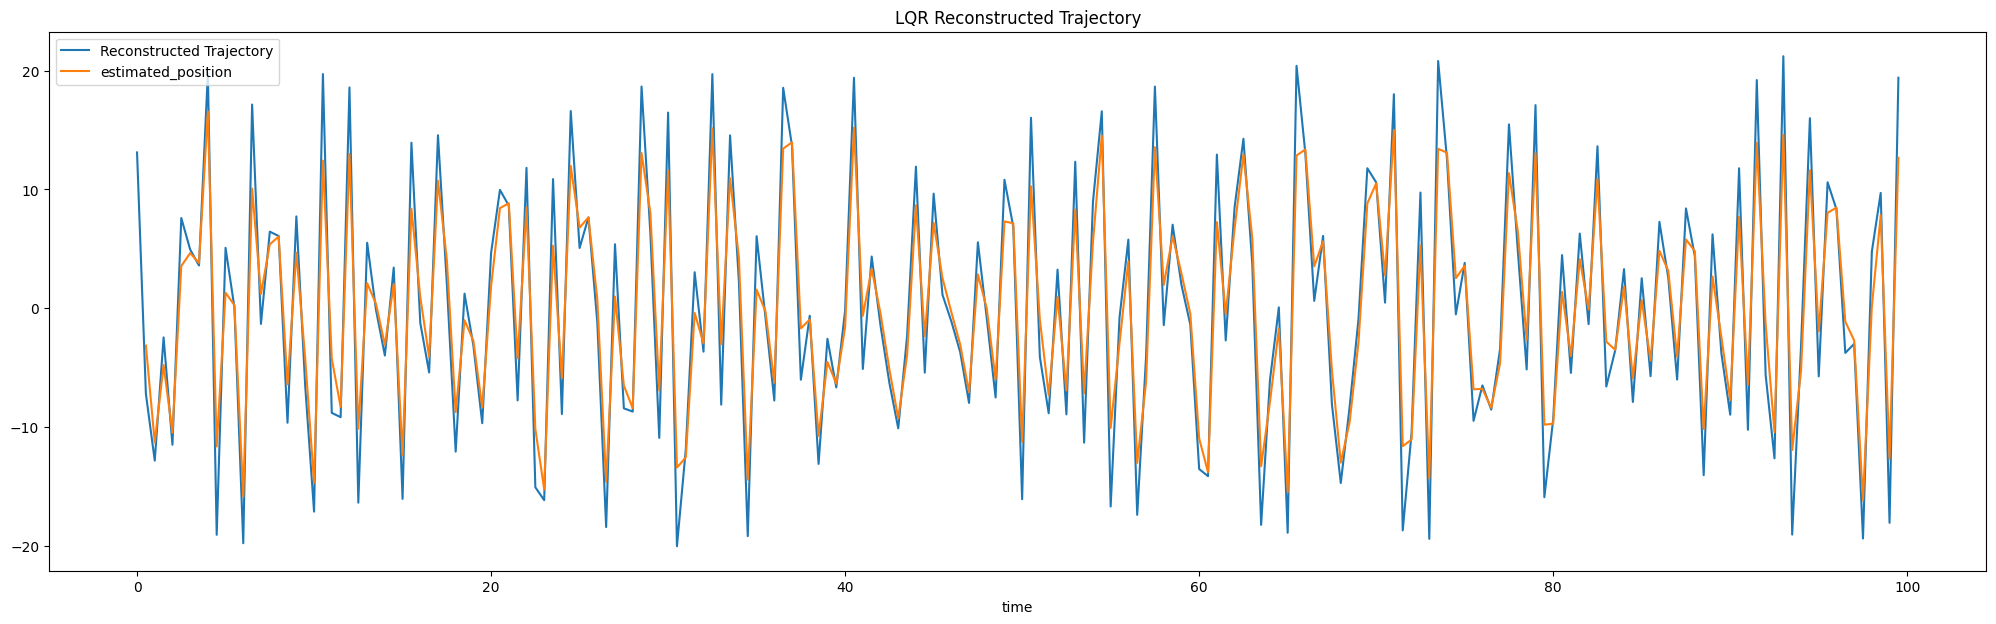

<Figure size 2500x700 with 0 Axes>

In [99]:
for file in csv_file:
    if file.endswith("_component.csv") or file.endswith("_position.csv"):
        continue
    df = pd.read_csv(file)
    headers = list(df.columns)[1:]
    # remove measured_position if exists
    if "measured_position" in headers:
        headers.remove("measured_position")
    print(headers)

    terms = file.split(".")[0] # Step 1: Remove file extension > 'file_name1'
    terms = terms.split("_")
    title = " ".join(terms) # Step 2: Split the string > ['file', 'name1']
    last_char = title[-1] # Step 3: Get the last character > '1' or '2'
    title = title[:-1] # Step 4: Remove the last character and capitalize the title
    if not(title == 'PID' or title == 'LQR'):
        title = title.title()
    
    # plot in a figure size x=25, y=7
    fig = plt.figure(figsize=(25, 7))
    if last_char == "1":
        plt.plot(trajectory["time"], trajectory["position"])
        title += " Original Trajectory"
        headers.insert(0, "Original Trajectory")
    elif last_char == "2":
        plt.plot(inverted_trajectory["time"], inverted_trajectory["position"])
        title += " Reconstructed Trajectory"
        headers.insert(0, "Reconstructed Trajectory")

    for header in headers[1:]:
        plt.plot(df["time"], df[header])

    plt.xlabel("time")
    plt.title("Modeling Trajectory")
    plt.legend(headers, loc="upper left")
    plt.title(title)
    plt.show()
    
    headers.clear()

    # Selected signal
    plt.figure(figsize=(25, 7))
    if "PID" in title:
        headers = [feature for feature in df.columns if "total_output" in feature]
    elif "Kalman" in title:
        headers = [feature for feature in df.columns if any(key in feature for key in ["error"])]

    if len(headers) == 0:
        continue

    for header in headers:
        plt.plot(df["time"], df[header])

    if last_char == "1":
        plt.plot(trajectory["time"], trajectory["position"])
        headers.insert(0, "Original Trajectory")
    elif last_char == "2":
        plt.plot(inverted_trajectory["time"], inverted_trajectory["position"])
        headers.insert(0, "Reconstructed Trajectory")

    plt.xlabel("time")
    plt.legend(headers, loc="upper left")
    plt.title(title + " Selected Signal")
    plt.show()
        